In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Gathering

In [38]:
data = pd.read_csv("Iris.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Pre-Processing

In [39]:
data.drop(["Id"], axis=1, inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Labeling

In [40]:
from sklearn.preprocessing import LabelEncoder

X = data[list(data.columns)[:-1]]
Y = data[list(data.columns)[-1]]

## Initialize Encoder
encoder = LabelEncoder()
encodedY = encoder.fit_transform(Y)
encodedY

## Scaling Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaledX = scaler.transform(X)

## Split
from sklearn import model_selection

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    scaledX,encodedY,
    test_size=0.2, random_state=3
)

# Modeling

In [41]:
## MOdeling

## Initialize Model
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state=1,max_depth=41, min_samples_split=26, splitter='random')

## Train Model
dtree.fit(xtrain, ytrain)

## Test Model
ypred = dtree.predict(xtest)

ypred == ytest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True])

# Evaluate Model

In [42]:
from sklearn.metrics import f1_score, confusion_matrix
print("Confusion Matrix: \n", confusion_matrix(ytest, ypred))
print("F1 Score: ", f1_score(y_true=ytest, y_pred=ypred, average=None))

Confusion Matrix: 
 [[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]
F1 Score:  [1.         0.88888889 0.90909091]


# Plot on Confusion Metrics

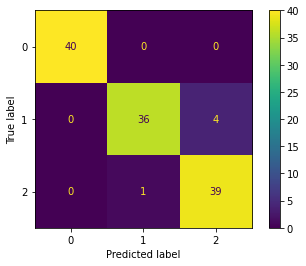

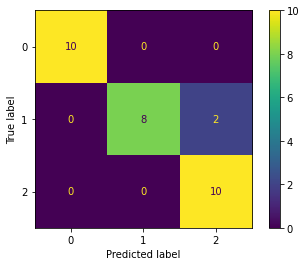

In [43]:
from sklearn import metrics

metrics.plot_confusion_matrix(dtree, xtrain, ytrain)
metrics.plot_confusion_matrix(dtree, xtest, ytest)

# Cross Validation Score

In [44]:
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import cross_val_score
model = tree.DecisionTreeClassifier()
cv = cross_val_score(dtree,scaledX,encodedY, cv=5, scoring="accuracy")

cv.mean()

0.9533333333333334

# Analyssis & Color, Plot

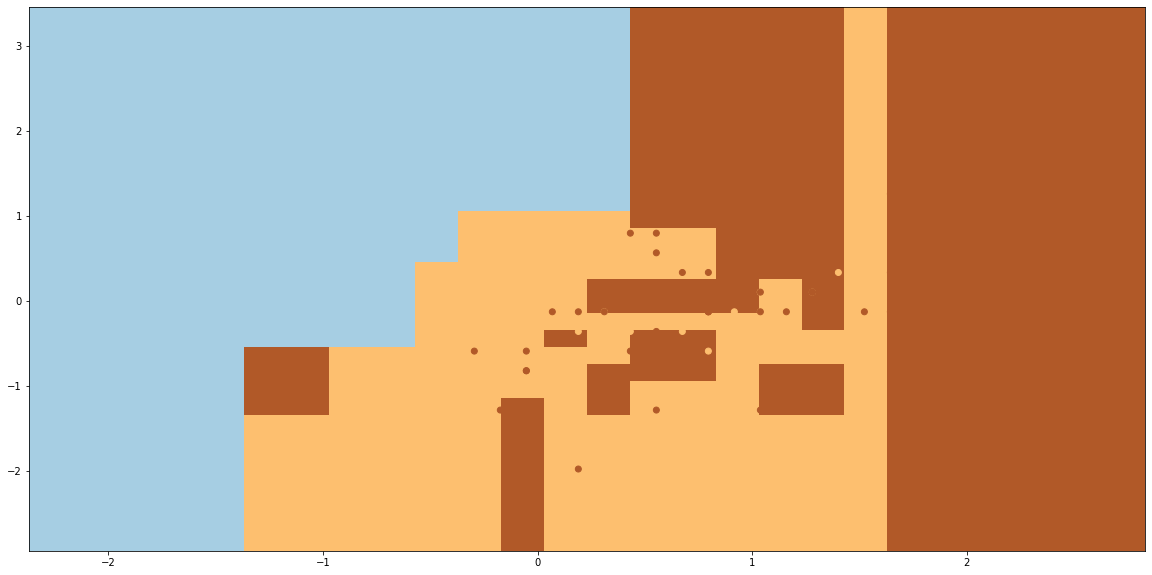

In [45]:
final_model = tree.DecisionTreeClassifier()
final_model.fit(scaledX[:, :2], encodedY)

xmin, xmax = scaledX[:, :2][:, 0].min() -.5, scaledX[:, :2][:,0].max() + .5
ymin, ymax = scaledX[:, :2][:, 1].min() -.5, scaledX[:, :2][:,1].max() + .5

xx, yy = np.meshgrid(np.arange(xmin,xmax, 0.2), np.arange(ymin,ymax,0.2))
z=final_model.predict(np.c_[xx.ravel(), yy.ravel()])
z

## color
z = z.reshape(xx.shape)
plt.figure(1, figsize=(20,10))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx,yy,z)

## Plot
plt.scatter(scaledX[:, :2][:, 0], scaledX[:, :2][:, 1], c=encodedY)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# Hyper Parameter Tuning

In [46]:
from sklearn.model_selection import RandomizedSearchCV

##
Tree = tree.DecisionTreeClassifier()

##
gridTree = RandomizedSearchCV(
    Tree,
    param_distributions ={
        'criterion': ['gini', 'entropy'],
        'splitter':['best', 'random'],
        'max_depth': list(range(5,50, 3)),
        'min_samples_split': list(range(2,40,2)),
        'max_features': [None, 'auto', 'sqrt', 'log2'],
    },
    cv = 5, scoring='accuracy', n_iter=20, n_jobs = -1, verbose=2
)
gridTree.fit(xtrain, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 8, 11, 14, 17, 20, 23,
                                                      26, 29, 32, 35, 38, 41,
                                                      44, 47],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20, 22, 24, 26,
                                                              28, 30, 32, 34,
                                                              36, 38],
                                        'splitter': ['best', 'random']},
  

In [47]:
gridTree.best_params_

{'splitter': 'best',
 'min_samples_split': 12,
 'max_features': 'log2',
 'max_depth': 11,
 'criterion': 'gini'}

In [48]:
## MOdeling

## Initialize Model
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state=1,max_depth=41, min_samples_split=26, max_features='sqrt', splitter='random')

## Train Model
dtree.fit(xtrain, ytrain)

## Test Model
ypred = dtree.predict(xtest)

ypred == ytest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True, False])

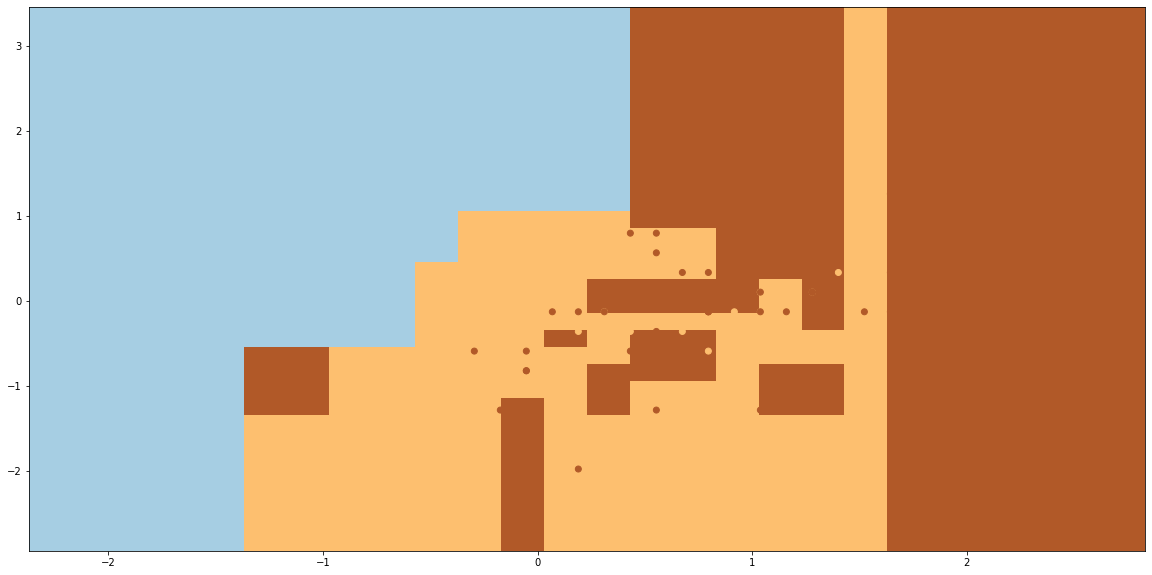

In [49]:
final_model = tree.DecisionTreeClassifier()
final_model.fit(scaledX[:, :2], encodedY)

xmin, xmax = scaledX[:, :2][:, 0].min() -.5, scaledX[:, :2][:,0].max() + .5
ymin, ymax = scaledX[:, :2][:, 1].min() -.5, scaledX[:, :2][:,1].max() + .5

xx, yy = np.meshgrid(np.arange(xmin,xmax, 0.2), np.arange(ymin,ymax,0.2))
z=final_model.predict(np.c_[xx.ravel(), yy.ravel()])
z

## color
z = z.reshape(xx.shape)
plt.figure(1, figsize=(20,10))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx,yy,z)

## Plot
plt.scatter(scaledX[:, :2][:, 0], scaledX[:, :2][:, 1], c=encodedY)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()